# Goals

* Using langsmith API to get run time stats for `SRAgent find-dataset` runs

In [1]:
import os
from pathlib import Path
import pandas as pd
import plotnine as pn

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 4)
pn.theme_set(pn.theme_bw())

In [3]:
# get base of github repo
base_dir = !git rev-parse --show-toplevel
base_dir = Path(base_dir[0])

# Langsmith tool calls

In [4]:
exe = base_dir / 'scripts' / 'langsmith-run-summary.py'
outfile = base_dir / 'data' / 'SRAgent_profiling' / 'langsmith_tool_calls.csv'
outfile.parent.mkdir(parents=True, exist_ok=True)

# run script
!{exe} --project SRAgent --days 7 --output-file {outfile}

2025-07-03 10:35:47 - INFO - Starting tool metadata extraction for project: SRAgent
2025-07-03 10:35:47 - INFO - Successfully connected to LangSmith
2025-07-03 10:35:47 - INFO - Extracting data from 2025-06-26 10:35:47.415760 to 2025-07-03 10:35:47.415760
2025-07-03 10:35:47 - INFO - Querying LangSmith for tool runs...
2025-07-03 10:35:56 - INFO - Retrieved 257 tool runs
2025-07-03 10:35:56 - INFO - Extracting tool metadata...
2025-07-03 10:35:56 - INFO - Successfully extracted metadata for 257 tool runs
2025-07-03 10:35:56 - INFO - Applying filters...
2025-07-03 10:35:56 - INFO - Filtered out 0 error runs
2025-07-03 10:35:56 - INFO - After filtering: 257 tool runs remain
2025-07-03 10:35:56 - INFO - Saving data in csv format...

✅ Successfully extracted tool metadata!
📊 Total tool calls: 257
🔧 Unique tools: 28
⏱️  Time range: 2025-06-26 to 2025-07-03
💾 Output saved to: /home/nickyoungblut/dev/python/scBaseCount_analysis/data/SRAgent_profiling/langsmith_tool_calls.csv


## Summarize the results

In [ ]:
df_tool_calls = pd.read_csv(outfile)
df_tool_calls

,run_id,trace_id,tool_name,run_type,start_time,end_time,duration_seconds,duration_ms,has_error,error_message,status,input_keys,input_size_chars,input_summary,output_keys,output_size_chars,output_summary,custom_metadata,tags,total_tokens,prompt_tokens,completion_tokens
0,48149a77-b068-4695-9bd0-abb34165b107,6e41431a-f1a2-448a-8a5f-6032a2752c31,efetch,tool,2025-07-02T20:00:30.800386,2025-07-02T20:00:31.348814,0.548428,548.428,False,NaN,success,['input'],60,"{'input': ""{'entrez_ids': ['35538296'], 'datab...",['output'],10491,"{'output': {'content': '{""EXPERIMENT_PACKAGE_S...","{'max_datasets': 1, 'use_database': False, 're...",['seq:step:1'],0,0,0
1,a931d975-bbfa-4810-a15e-a10d0555540c,6e41431a-f1a2-448a-8a5f-6032a2752c31,invoke_efetch_agent,tool,2025-07-02T20:00:28.889893,2025-07-02T20:00:36.731486,7.841593,7841.593,False,NaN,success,['input'],59,"{'input': ""{'message': 'eFetch database=sra id...",['output'],1084,"{'output': {'content': ""{'messages': [AIMessag...","{'max_datasets': 1, 'use_database': False, 're...",['seq:step:1'],4766,4460,306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,f50309dc-4163-45ac-ab03-4389fab35cec,0f07ffc2-b216-43ba-9435-91a1b9b80736,get_experiment_metadata,tool,2025-07-02T18:01:32.342877,2025-07-02T18:01:34.401753,2.058876,2058.876,False,NaN,success,['input'],54,"{'input': ""{'experiment_accessions': ['SRX4967...",['output'],447,"{'output': {'content': '[{""experiment"": ""SRX49...","{'langgraph_step': 2, 'langgraph_node': 'tools...",['seq:step:1'],0,0,0
256,d5003f24-4ada-4991-9cce-596f1bccdf97,0f07ffc2-b216-43ba-9435-91a1b9b80736,invoke_bigquery_agent,tool,2025-07-02T18:01:27.879115,2025-07-02T18:01:49.968981,22.089866,22089.866,False,NaN,success,['input'],279,"{'input': ""{'message': 'Retrieve metadata for ...",['output'],1097,"{'output': {'content': ""{'messages': [AIMessag...","{'langgraph_step': 2, 'langgraph_node': 'tools...",['seq:step:1'],6642,5760,882


In [ ]:
# filter to successful runs
df_tool_calls = df_tool_calls[df_tool_calls["has_error"] == False]
df_tool_calls

,run_id,trace_id,tool_name,run_type,start_time,end_time,duration_seconds,duration_ms,has_error,error_message,status,input_keys,input_size_chars,input_summary,output_keys,output_size_chars,output_summary,custom_metadata,tags,total_tokens,prompt_tokens,completion_tokens
0,48149a77-b068-4695-9bd0-abb34165b107,6e41431a-f1a2-448a-8a5f-6032a2752c31,efetch,tool,2025-07-02T20:00:30.800386,2025-07-02T20:00:31.348814,0.548428,548.428,False,NaN,success,['input'],60,"{'input': ""{'entrez_ids': ['35538296'], 'datab...",['output'],10491,"{'output': {'content': '{""EXPERIMENT_PACKAGE_S...","{'max_datasets': 1, 'use_database': False, 're...",['seq:step:1'],0,0,0
1,a931d975-bbfa-4810-a15e-a10d0555540c,6e41431a-f1a2-448a-8a5f-6032a2752c31,invoke_efetch_agent,tool,2025-07-02T20:00:28.889893,2025-07-02T20:00:36.731486,7.841593,7841.593,False,NaN,success,['input'],59,"{'input': ""{'message': 'eFetch database=sra id...",['output'],1084,"{'output': {'content': ""{'messages': [AIMessag...","{'max_datasets': 1, 'use_database': False, 're...",['seq:step:1'],4766,4460,306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,f50309dc-4163-45ac-ab03-4389fab35cec,0f07ffc2-b216-43ba-9435-91a1b9b80736,get_experiment_metadata,tool,2025-07-02T18:01:32.342877,2025-07-02T18:01:34.401753,2.058876,2058.876,False,NaN,success,['input'],54,"{'input': ""{'experiment_accessions': ['SRX4967...",['output'],447,"{'output': {'content': '[{""experiment"": ""SRX49...","{'langgraph_step': 2, 'langgraph_node': 'tools...",['seq:step:1'],0,0,0
256,d5003f24-4ada-4991-9cce-596f1bccdf97,0f07ffc2-b216-43ba-9435-91a1b9b80736,invoke_bigquery_agent,tool,2025-07-02T18:01:27.879115,2025-07-02T18:01:49.968981,22.089866,22089.866,False,NaN,success,['input'],279,"{'input': ""{'message': 'Retrieve metadata for ...",['output'],1097,"{'output': {'content': ""{'messages': [AIMessag...","{'langgraph_step': 2, 'langgraph_node': 'tools...",['seq:step:1'],6642,5760,882


In [7]:
# add tool_group: `invoke_` prefix = agent, otherwise = tool
df_tool_calls["tool_group"] = df_tool_calls["tool_name"].apply(lambda x: "agent" if x.startswith("invoke_") else "tool")
df_tool_calls["tool_group"].value_counts()

tool_group
tool     134
agent    123
Name: count, dtype: int64

In [8]:
# filter out outliers
df_tool_calls = df_tool_calls[df_tool_calls["duration_seconds"] < 200]
df_tool_calls

,run_id,trace_id,tool_name,run_type,start_time,end_time,duration_seconds,duration_ms,has_error,error_message,status,input_keys,input_size_chars,input_summary,output_keys,output_size_chars,output_summary,custom_metadata,tags,total_tokens,prompt_tokens,completion_tokens,tool_group
0,48149a77-b068-4695-9bd0-abb34165b107,6e41431a-f1a2-448a-8a5f-6032a2752c31,efetch,tool,2025-07-02T20:00:30.800386,2025-07-02T20:00:31.348814,0.548428,548.428,False,NaN,success,['input'],60,"{'input': ""{'entrez_ids': ['35538296'], 'datab...",['output'],10491,"{'output': {'content': '{""EXPERIMENT_PACKAGE_S...","{'max_datasets': 1, 'use_database': False, 're...",['seq:step:1'],0,0,0,tool
1,a931d975-bbfa-4810-a15e-a10d0555540c,6e41431a-f1a2-448a-8a5f-6032a2752c31,invoke_efetch_agent,tool,2025-07-02T20:00:28.889893,2025-07-02T20:00:36.731486,7.841593,7841.593,False,NaN,success,['input'],59,"{'input': ""{'message': 'eFetch database=sra id...",['output'],1084,"{'output': {'content': ""{'messages': [AIMessag...","{'max_datasets': 1, 'use_database': False, 're...",['seq:step:1'],4766,4460,306,agent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,f50309dc-4163-45ac-ab03-4389fab35cec,0f07ffc2-b216-43ba-9435-91a1b9b80736,get_experiment_metadata,tool,2025-07-02T18:01:32.342877,2025-07-02T18:01:34.401753,2.058876,2058.876,False,NaN,success,['input'],54,"{'input': ""{'experiment_accessions': ['SRX4967...",['output'],447,"{'output': {'content': '[{""experiment"": ""SRX49...","{'langgraph_step': 2, 'langgraph_node': 'tools...",['seq:step:1'],0,0,0,tool
256,d5003f24-4ada-4991-9cce-596f1bccdf97,0f07ffc2-b216-43ba-9435-91a1b9b80736,invoke_bigquery_agent,tool,2025-07-02T18:01:27.879115,2025-07-02T18:01:49.968981,22.089866,22089.866,False,NaN,success,['input'],279,"{'input': ""{'message': 'Retrieve metadata for ...",['output'],1097,"{'output': {'content': ""{'messages': [AIMessag...","{'langgraph_step': 2, 'langgraph_node': 'tools...",['seq:step:1'],6642,5760,882,agent


In [9]:
pd.set_option('display.max_rows', None)
df_tool_calls["tool_name"].value_counts()

tool_name
invoke_efetch_agent                22
efetch                             21
invoke_bigquery_agent              16
invoke_entrez_agent                15
get_experiment_metadata            13
invoke_sragent_agent               13
invoke_ncbi_fetch_agent            13
fetch_ncbi_record                  12
invoke_esearch_agent               11
esearch                            11
get_neighbors                      10
query_vector_db                     8
which_entrez_databases              8
query_uberon_ols                    8
get_run_metadata                    8
invoke_tissue_ontology_agent        7
invoke_tissue_ontology_workflow     7
invoke_elink_agent                  7
invoke_find_datasets_agent          7
esearch_scrna                       7
esummary                            7
elink                               6
get_study_experiment_run            5
invoke_esummary_agent               4
fetch_geo_record                    4
fetch_biosample_record              3
fe

In [10]:
pd.set_option('display.max_rows', 4)

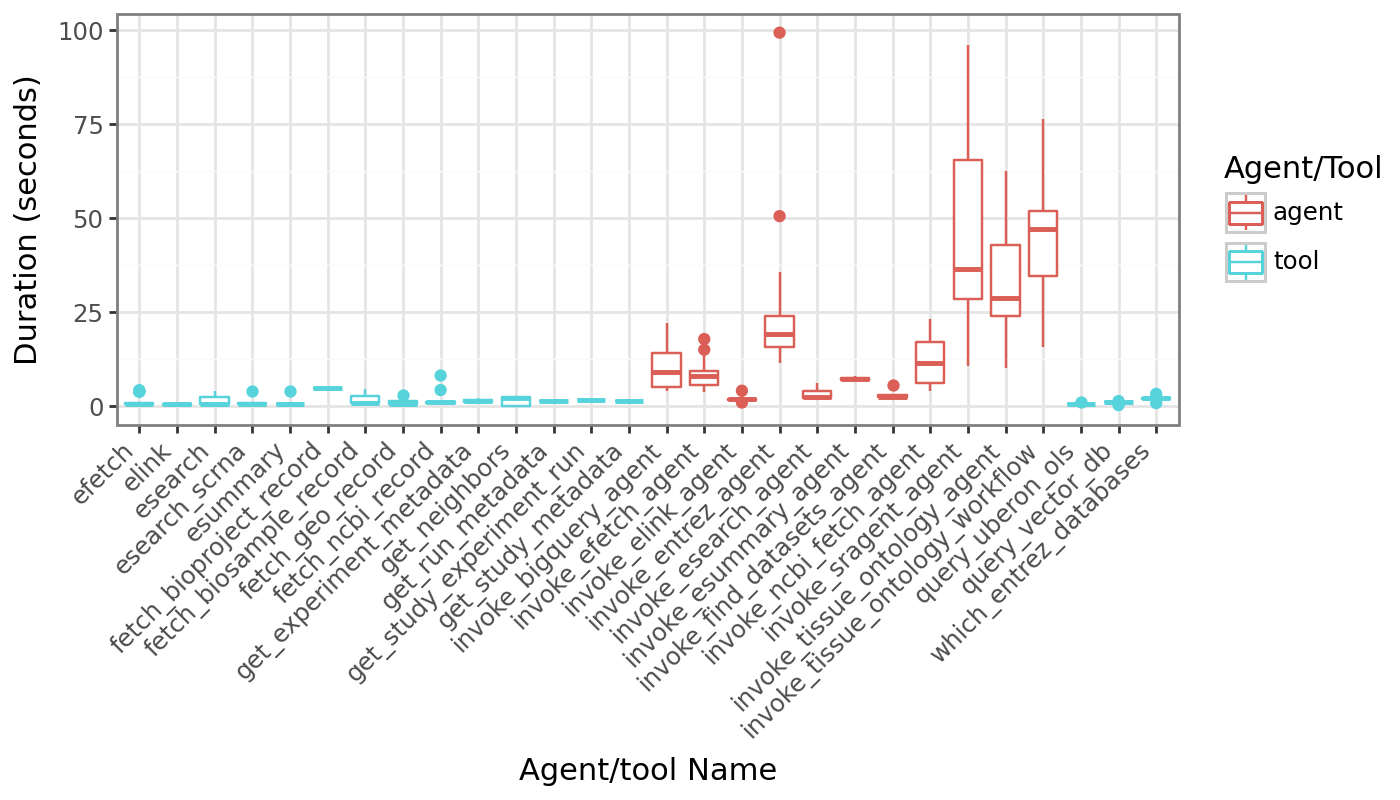

In [11]:
# plot time per tool name
p = (
    pn.ggplot(df_tool_calls, pn.aes(x="tool_name", y="duration_seconds", color="tool_group"))
    + pn.geom_boxplot()
    + pn.labs(x="Agent/tool Name", y="Duration (seconds)", color="Agent/Tool")
    + pn.theme(
        figure_size=(7, 4),
        axis_text_x=pn.element_text(angle=45, hjust=1)
    )
)
p

In [11]:
# save the plot
outfile = base_dir / "figures" / "sragent_profiling-time_stats.svg"
pn.ggsave(p, outfile)

/home/nickyoungblut/miniforge3/envs/langsmith/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 7 x 4 in image.
/home/nickyoungblut/miniforge3/envs/langsmith/lib/python3.11/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: /home/nickyoungblut/dev/python/scBaseCount_analysis/figures/sragent_profiling-time_stats.svg


In [17]:
# mean time per tool call
pd.set_option('display.max_rows', None)
df_tool_calls.groupby("tool_name").agg({"duration_seconds": "mean"}).reset_index().sort_values("duration_seconds", ascending=False)

,tool_name,duration_seconds
22,invoke_sragent_agent,47.577161
24,invoke_tissue_ontology_workflow,44.598162
23,invoke_tissue_ontology_agent,33.664545
17,invoke_entrez_agent,26.859475
21,invoke_ncbi_fetch_agent,11.956634
14,invoke_bigquery_agent,10.531875
15,invoke_efetch_agent,8.543383
19,invoke_esummary_agent,7.217007
5,fetch_bioproject_record,4.685145
18,invoke_esearch_agent,3.190766


In [16]:
pd.set_option('display.max_rows', 4)

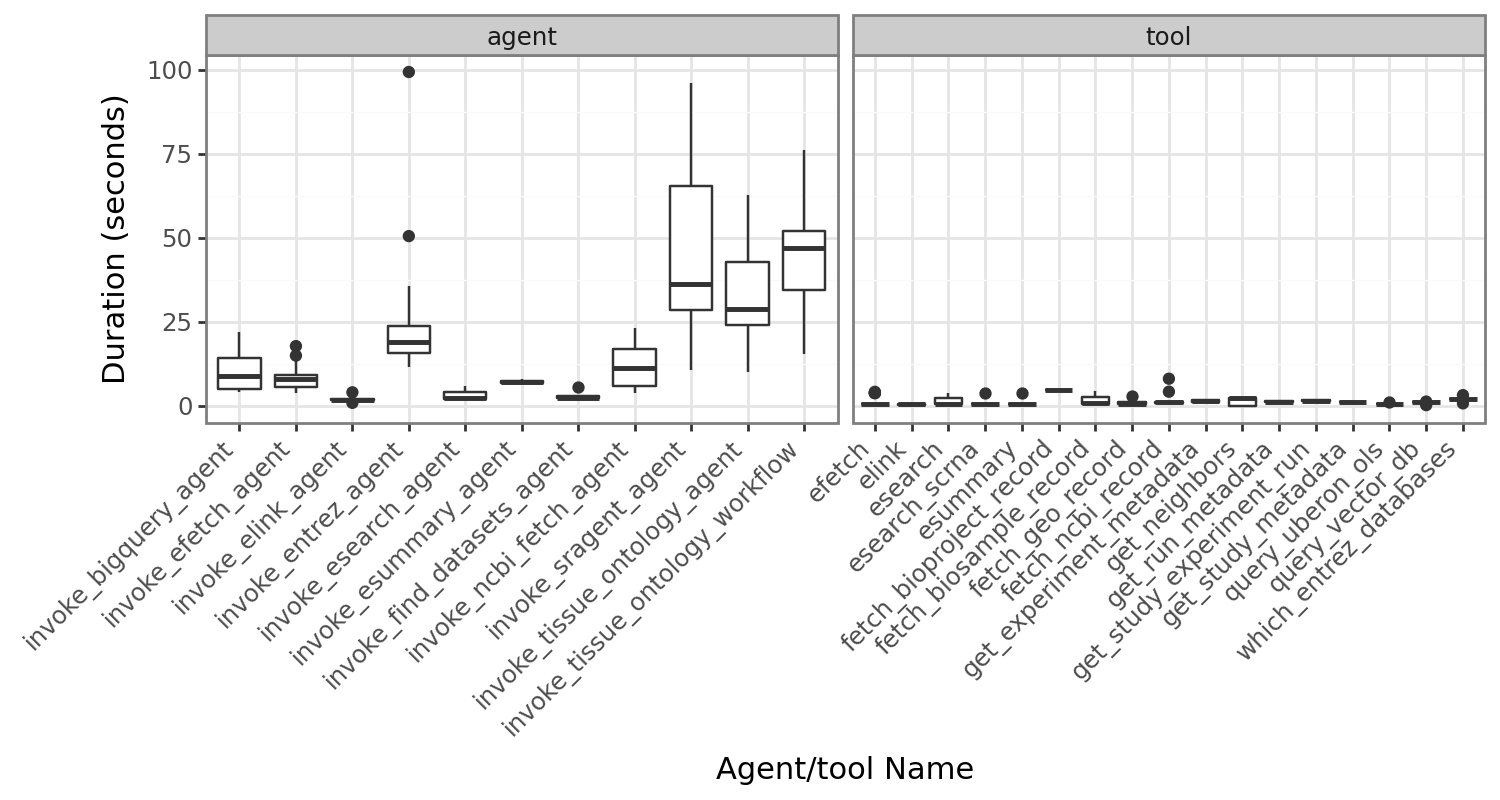

In [12]:
# plot time per tool name
p = (
    pn.ggplot(df_tool_calls, pn.aes(x="tool_name", y="duration_seconds"))
    + pn.geom_boxplot()
    + pn.facet_wrap("tool_group", scales="free_x")
    + pn.labs(x="Agent/tool Name", y="Duration (seconds)", color="Agent/Tool")
    + pn.theme(
        figure_size=(7.5, 4),
        axis_text_x=pn.element_text(angle=45, hjust=1)
    )
)
p

# LangSmith LLM calls

In [15]:
pd.set_option('display.max_rows', 4)

In [13]:
exe = base_dir / 'scripts' / 'langsmith-run-summary.py'
outfile = base_dir / 'data' / 'SRAgent_profiling' / 'langsmith_llm_calls.csv'
outfile.parent.mkdir(parents=True, exist_ok=True)

# run script
!{exe} --project SRAgent --days 7 --run-type llm --output-file {outfile}

2025-07-02 13:19:19 - INFO - Starting llm metadata extraction for project: SRAgent
2025-07-02 13:19:19 - INFO - Successfully connected to LangSmith
2025-07-02 13:19:19 - INFO - Extracting data from 2025-06-25 13:19:19.343088 to 2025-07-02 13:19:19.343088
2025-07-02 13:19:19 - INFO - Querying LangSmith for llm runs...
2025-07-02 13:19:26 - INFO - Retrieved 395 llm runs
2025-07-02 13:19:26 - INFO - Extracting llm metadata...
2025-07-02 13:19:26 - INFO - Successfully extracted metadata for 395 llm runs
2025-07-02 13:19:26 - INFO - Applying filters...
2025-07-02 13:19:26 - INFO - Filtered out 0 error runs
2025-07-02 13:19:26 - INFO - After filtering: 395 llm runs remain
2025-07-02 13:19:26 - INFO - Saving data in csv format...

✅ Successfully extracted llm metadata!
📊 Total llm calls: 395
🤖 Unique models: 3
🎯 Total tokens: 519,835
💰 Total cost: $0.7020
⏱️  Time range: 2025-06-25 to 2025-07-02
💾 Output saved to: /home/nickyoungblut/dev/python/scBaseCount_analysis/data/SRAgent_profiling/lang

In [16]:
df_llm_calls = pd.read_csv(outfile)
df_llm_calls

,run_id,trace_id,run_name,run_type,start_time,end_time,duration_seconds,duration_ms,has_error,error_message,status,input_keys,input_size_chars,input_summary,output_keys,output_size_chars,output_summary,model_name,temperature,max_tokens,top_p,frequency_penalty,presence_penalty,total_tokens,prompt_tokens,completion_tokens,prompt_cost,completion_cost,total_cost,custom_metadata,tags
0,d5469aa5-2dfb-4599-a747-7d4ef18bb311,6e41431a-f1a2-448a-8a5f-6032a2752c31,FlexTierChatOpenAI,llm,2025-07-02T20:00:37.810970,2025-07-02T20:00:40.126633,2.315663,2315.663,False,NaN,success,['messages'],7304,"{'messages': [[{'lc': 1, 'type': 'constructor'...","['generations', 'llm_output', 'run', 'type']",1668,{'generations': [[{'generation_info': {'finish...,o4-mini,NaN,NaN,NaN,NaN,NaN,1254,1155,99,0.001270,0.000436,0.001706,"{'max_datasets': 1, 'use_database': False, 're...",['seq:step:2']
1,d0f032c7-e9f1-4cda-814d-535700bd6ca4,6e41431a-f1a2-448a-8a5f-6032a2752c31,FlexTierChatOpenAI,llm,2025-07-02T20:00:36.734422,2025-07-02T20:00:37.800319,1.065897,1065.897,False,NaN,success,['messages'],7462,"{'messages': [[{'lc': 1, 'type': 'constructor'...","['generations', 'llm_output', 'run', 'type']",1665,{'generations': [[{'generation_info': {'finish...,o4-mini,NaN,NaN,NaN,NaN,NaN,1357,1322,35,0.001454,0.000154,0.001608,"{'max_datasets': 1, 'use_database': False, 're...",['seq:step:2']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,f30cf5a2-7bde-4bae-aa75-20b7dd1afe18,2bd6b641-153b-475d-ab2a-486743ceb671,FlexTierChatOpenAI,llm,2025-07-02T15:59:38.051760,2025-07-02T15:59:38.764251,0.712491,712.491,False,NaN,success,['messages'],918,"{'messages': [[{'lc': 1, 'type': 'constructor'...","['generations', 'llm_output', 'run', 'type']",1793,{'generations': [[{'generation_info': {'finish...,gpt-4.1-mini,0.1,NaN,NaN,NaN,NaN,213,185,28,0.000074,0.000045,0.000119,"{'ls_provider': 'openai', 'ls_model_name': 'gp...",['seq:step:2']
394,4f4a4b79-2fda-4719-81d0-0fd6a96c5196,83f63806-cb7b-46fc-96a0-7f3de8d70891,FlexTierChatOpenAI,llm,2025-07-02T15:59:35.047937,2025-07-02T15:59:35.902302,0.854365,854.365,False,NaN,success,['messages'],1461,"{'messages': [[{'lc': 1, 'type': 'constructor'...","['generations', 'llm_output', 'run', 'type']",2019,{'generations': [[{'generation_info': {'finish...,gpt-4.1-mini,0.1,NaN,NaN,NaN,NaN,299,272,27,0.000109,0.000043,0.000152,"{'use_database': True, 'reprocess_existing': F...",['seq:step:1']


### Cost per run

In [43]:
# summarize total_cost by run_id
df_costs = df_llm_calls.groupby(["trace_id"]).agg({"total_cost": "sum", "total_tokens": "sum"}).reset_index()
df_costs

,trace_id,total_cost,total_tokens
0,08fd7b9c-d512-4c4f-ab72-4dfd5e4663c8,0.207922,155036
1,0a9f7f78-aad7-4d9e-83c6-b75d3d3cbba7,0.127967,86275
...,...,...,...
16,d3aa645e-1914-4527-8b96-60289752030a,0.000595,1389
17,f8ab4972-8225-41a6-8f4f-0878921d6245,0.000313,2106


In [44]:
# filter out small runs
df_costs = df_costs[df_costs["total_tokens"] > 1e4]
df_costs

,trace_id,total_cost,total_tokens
0,08fd7b9c-d512-4c4f-ab72-4dfd5e4663c8,0.207922,155036
1,0a9f7f78-aad7-4d9e-83c6-b75d3d3cbba7,0.127967,86275
...,...,...,...
12,b5842689-e78d-4e9f-beb2-a2894adb33ab,0.044927,31774
13,bb9d22e3-b014-44f7-8005-d0cd0089f75e,0.063490,43859


In [46]:
# cost per run
pd.set_option("display.max_rows", None)
df_costs["total_cost"].describe()

count    8.000000
mean     0.087359
std      0.055803
min      0.042534
25%      0.052027
50%      0.070694
75%      0.091796
max      0.207922
Name: total_cost, dtype: float64

In [48]:
pd.set_option("display.max_rows", 4)

### Tokens per run

In [55]:
# summarize total_cost by run_id
df_tokens = df_llm_calls.groupby(["trace_id"]).agg({"total_tokens": "sum"}).reset_index()
df_tokens

,trace_id,total_tokens
0,08fd7b9c-d512-4c4f-ab72-4dfd5e4663c8,155036
1,0a9f7f78-aad7-4d9e-83c6-b75d3d3cbba7,86275
...,...,...
16,d3aa645e-1914-4527-8b96-60289752030a,1389
17,f8ab4972-8225-41a6-8f4f-0878921d6245,2106


In [57]:
df_tokens = df_tokens[df_tokens["total_tokens"] > 1e4]
pd.set_option("display.max_rows", None)
df_tokens["total_tokens"].describe()

count         8.000000
mean      63494.875000
std       40833.226476
min       31774.000000
25%       40907.250000
50%       48337.000000
75%       67060.000000
max      155036.000000
Name: total_tokens, dtype: float64

In [58]:
pd.set_option("display.max_rows", 4)